In [155]:
import pandas as pd
import nltk

In [156]:
csv_file = r'C:\Users\groov\PythonCode\output\trump_tweets\trump_tweets.csv'

df = pd.read_csv(csv_file, names=['date_posted', 'tweet'])
df.tail()

,date_posted,tweet
71,2019-10-13 22:16:39+00:00,".....BY THE WAY, DON’T CALL ME AGAIN, I’LL CAL..."
72,2019-10-13 23:09:01+00:00,.@marklevinshow on @FoxNews is doing a big sho...
73,2019-10-13 23:27:49+00:00,The U.S. has the worst of the ISIS prisoners. ...
74,2019-10-14 00:10:14+00:00,Somebody please explain to Chris Wallace of Fo...
75,2019-10-14 00:34:01+00:00,“Serial killers get more Due Process than the ...


In [157]:
df.shape

(76, 2)

In [158]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['tokens'] = df['tweet'].apply(tokenizer.tokenize)

df['tokens'][0:5]

0    [“, There, are, no, felonies, ,, there, are, n...
1    [So, many, people, conveniently, forget, that,...
2    [..., ..good, health, ,, at, my, request, ,, P...
3    [We, may, be, in, the, process, of, leaving, S...
4    [..., .understands, that, while, we, only, had...
Name: tokens, dtype: object

In [159]:
from nltk.util import ngrams

list(ngrams(df['tokens'][0], 3))[0:5]

[('“', 'There', 'are'),
 ('There', 'are', 'no'),
 ('are', 'no', 'felonies'),
 ('no', 'felonies', ','),
 ('felonies', ',', 'there')]

In [160]:
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words_sklearn

stop_words_nltk = nltk.corpus.stopwords.words('english')
print(stop_words_nltk[0:5])
print(list(stop_words_sklearn)[0:5])

['i', 'me', 'my', 'myself', 'we']
['how', 'enough', 'always', 'otherwise', 'towards']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
stop_words = []

stop_words = stop_words + stop_words_nltk
stop_words = stop_words + list(stop_words_sklearn)
stop_words = list(set(stop_words))
#& amp ;
stop_words_mine = ['“', '”', ',', '@', '’', '!', '&amp;', '&', 'amp', ';', '...']
stop_words = stop_words + stop_words_mine

len(stop_words), len(stop_words_nltk), len(list(stop_words_sklearn))

(389, 179, 318)

In [162]:
tokens = [token for token in df['tokens'][0] if token not in stop_words]
" ".join(tokens)

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [163]:
# stemming removes the small meaning differences of pluralization or posssessive endings of words to normalize vocabulary
# it can reduce the precision score of your search results, but would improve the recall score for returning relevant docs
# so it is often useful to be able to turn off stemming where you want precision

# two of the most popular stemmers are Porter and Snowball. They were both created by the scientist Martin Porter.

In [164]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann A scam'

In [165]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann a scam'

In [166]:
# lemmatization can associate words together by their meaning even if their spelling is different
# like stemming, this can make your model less precise but more general
# it is potentially more accurate than stemming because it takes into account word meaning
# some lemmatizers use the word's part of speech in addition to spelling to improve accuracy
# so, lemmatizers are better than stemmers for most applications.

# and if you really want the dimension reduction and recall improvement of a stemmer in your information 
# retrieval pipeline, you shoudl probably also use a lemmatizer right befor the stemmer.
# because the lemma of a word is a valid English word, stemmers work well on the output of a lemmatizer

In [167]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

" ".join(lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'There felony Impeachable offenses. The Constitution clear need bribery treason high crime misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [168]:
" ".join(tokens) # slight difference

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [169]:
# when should you use a lemmatizer or a stemmer?
# stemmers are generally faster to compute and require less-complex code and datasets. but stemmers make more errors
# and stem a far greater number of words, reducing the meaning of your text much more than a lemmatizer will.

# both stemmers will reduce the vocabulary of your text and increase the ambiguity of the text. but lemmatizers do
# a better job at retaining information content of a word. so some packages such as spaCy do not provide stemming functions.

In [170]:
# VADER was one of the first rule-based sentiment analysis algorithms. 
# it stands for Valence Aware Dictionary for sEntiment Reasoning.
# nltk has an implementation of the VADER algorithm

In [171]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [172]:
#[token for token in df['tokens'][0] if token not in stop_words]

for i in range(len(df['tokens'])):
    df['tokens'][i] = [token for token in df['tokens'][i] if token not in stop_words]


In [173]:
sa_tweets = []

# put it back into sentence form so sa can handle it.
for i in range(len(df['tokens'])):
    sa_tweets.append(" ".join(df['tokens'][i]))

In [174]:
df['tokens']

0     [There, felonies, Impeachable, offenses., The,...
1     [So, people, conveniently, forget, Turkey, big...
2     [..good, health, request, Pastor, Brunson, yea...
3     [We, process, leaving, Syria, way, Abandoned, ...
4     [.understands, 50, soldiers, remaining, sectio...
5     [I, love, send, Ambassador, Sondland, really, ...
6     [.to, see., Importantly, Ambassador, Sondland,...
7     [I, think, Crooked, Hillary, Clinton, enter, r...
8     [Thank, Lt., Bob, Kroll, great, Minneapolis, P...
9     [Someone, tell, Radical, Left, Mayor, Minneapo...
10    [Hasn, Adam, Schiff, fully, discredited, ?, Do...
11    [Radical, Left, Dem, Mayor, Minneapolis, Jacob...
12    [.In, fact, Cops, For, Trump, T-shirt, Web, Si...
13    [.If, Runoff, Louisiana, great, new, Republica...
14    [Big, Rally, Louisiana, Friday, night., Must, ...
15    [Gasoline, Prices, State, California, MUCH, HI...
16    [Bob, Mueller, pursuing, FBI, Director, job, m...
17    [Wow, Just, Breaking, :, The, (, big, deal

In [175]:
neg = []
neu = []
pos = []
compound = []

for tweet in sa_tweets:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()
    
    neg.append(sa.polarity_scores(tweet)['neg'])
    neu.append(sa.polarity_scores(tweet)['neu'])
    pos.append(sa.polarity_scores(tweet)['pos'])
    compound.append(sa.polarity_scores(tweet)['compound'])

There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam
{'neg': 0.391, 'neu': 0.528, 'pos': 0.081, 'compound': -0.875}

So people conveniently forget Turkey big trading partner United States fact make structural steel frame F-35 Fighter Jet. They good deal helping save lives Idlib Province returning ..
{'neg': 0.059, 'neu': 0.597, 'pos': 0.345, 'compound': 0.8603}

..good health request Pastor Brunson years long prison term remaining. Also remember importantly Turkey important member good standing NATO. He coming U.S. guest November 13th. # ENDENDLESSWARS
{'neg': 0.102, 'neu': 0.681, 'pos': 0.217, 'compound': 0.4019}

We process leaving Syria way Abandoned Kurds special people wonderful fighters. Likewise relationship Turkey NATO Trading partner good. Turkey large Kurdish population fully .
{'neg': 0.133, 'neu': 0.571, 'pos': 0.295, 'compound': 0.7269}

.under

Louisiana vote REPUBLICAN going big game today. A runoff tremendous win Great State - lower taxes car insurance better protection 2nd Amendment Fantastic night
{'neg': 0.065, 'neu': 0.506, 'pos': 0.429, 'compound': 0.9217}

So legendary crime buster greatest Mayor history NYC Rudy Giuliani. He little rough edges great guy wonderful lawyer. Such sided Witch Hunt going USA. Deep State. Shameful
{'neg': 0.225, 'neu': 0.497, 'pos': 0.278, 'compound': 0.5037}

The Endless Wars Must End
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.5574}

The Governor Louisiana John Bel Edwards poor job. NOW HE IS IN A RUNOFF WITH A GREAT REPUBLICAN EddieRispone. Thank Louisiana 66 % 47 % I explained bad job Governor .
{'neg': 0.189, 'neu': 0.601, 'pos': 0.21, 'compound': 0.186}

The people got Middle East Quicksand 8 Trillion Dollars thousands lives ( millions lives count ) fighting there. Don listen people got clue. They proven inept
{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.3612}



In [176]:
sa_df = pd.DataFrame({'neg': neg, 'neu': neu, 'pos': pos, 'compound': compound, 'tweet': df['tweet'], 'sa_tweet': sa_tweets})
sa_df.head()

,neg,neu,pos,compound,tweet,sa_tweet
0,0.391,0.528,0.081,-0.8750,"“There are no felonies, there are no Impeachab...",There felonies Impeachable offenses. The Const...
1,0.059,0.597,0.345,0.8603,So many people conveniently forget that Turkey...,So people conveniently forget Turkey big tradi...
2,0.102,0.681,0.217,0.4019,".....good health, at my request, Pastor Brunso...",..good health request Pastor Brunson years lon...
3,0.133,0.571,0.295,0.7269,"We may be in the process of leaving Syria, but...",We process leaving Syria way Abandoned Kurds s...
4,0.272,0.640,0.088,-0.6808,....understands that while we only had 50 sold...,.understands 50 soldiers remaining section Syr...


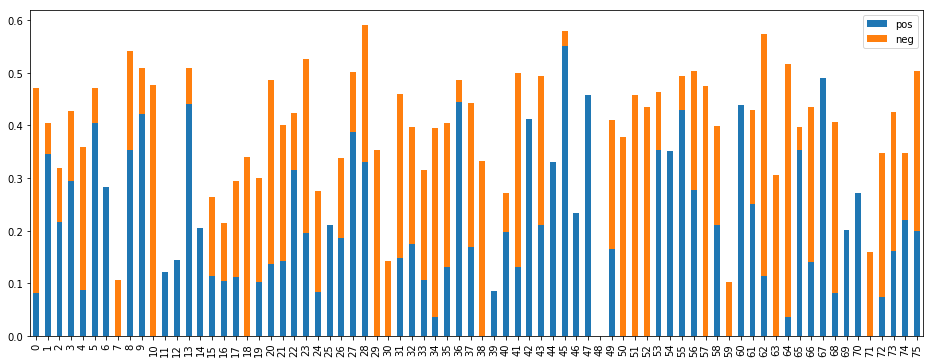

In [177]:
import matplotlib.pyplot
%matplotlib inline

sa_df[['pos', 'neg']].plot.bar(stacked=True, figsize=(16,6))

In [178]:
sa_df.describe()

,neg,neu,pos,compound
count,76.000000,76.000000,76.000000,76.000000
mean,0.182421,0.627289,0.190316,0.017946
std,0.146914,0.130297,0.147967,0.695042
min,0.000000,0.410000,0.000000,-0.953100
25%,0.055250,0.527500,0.082750,-0.642600
50%,0.169000,0.598500,0.168000,-0.038700
75%,0.297500,0.700750,0.300000,0.758950
max,0.480000,1.000000,0.551000,0.981900


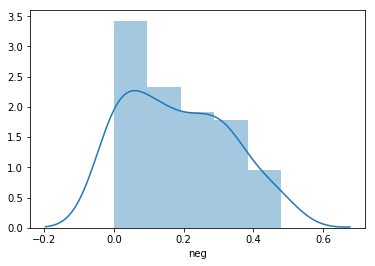

In [179]:
import seaborn as sns

sns.distplot(sa_df['neg'])

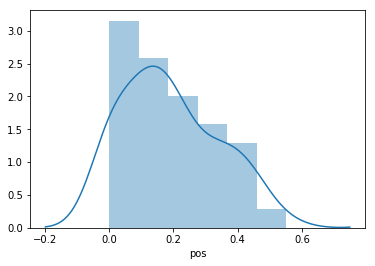

In [180]:
sns.distplot(sa_df['pos'])

In [181]:
for tweet in sa_df[sa_df['pos'] > 0.4]['sa_tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()

I love send Ambassador Sondland really good man great American testify unfortunately testifying totally compromised kangaroo court Republican rights taken away true facts allowed public .
{'neg': 0.067, 'neu': 0.528, 'pos': 0.405, 'compound': 0.921}

Someone tell Radical Left Mayor Minneapolis price Free Speech. Probably illegal I stand strongly proudly great Police Officers Law Enforcement Minneapolis Great State Minnesota See Thursday Night
{'neg': 0.088, 'neu': 0.49, 'pos': 0.422, 'compound': 0.9274}

.If Runoff Louisiana great new Republican Governor Cut Taxes Car Insurance fabulous job family. Vote Republican Party Honest Abe Lincoln
{'neg': 0.069, 'neu': 0.49, 'pos': 0.441, 'compound': 0.9081}

Thank OANN One America News fair coverage brilliant reporting. It appreciated people trying hard new consistent powerful VOICE See tonight Big Rally Minneapolis .
{'neg': 0.042, 'neu': 0.514, 'pos': 0.444, 'compound': 0.9231}

Good things happening China Trade Talk Meeting. Warmer feelings

In [182]:
for tweet in sa_df[sa_df['neg'] > 0.4]['sa_tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()
    
# the war one is interesting, because that's actually a very positive message

Hasn Adam Schiff fully discredited ? Do continue listening lies ?
{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.7471}

Schiff aides worked Whistleblower. foxandfriends RepLeeZeldin Schiff lying mess
{'neg': 0.457, 'neu': 0.543, 'pos': 0.0, 'compound': -0.7096}

The case Major Mathew Golsteyn review White House. Mathew highly decorated Green Beret tried killing Taliban bombmaker. We train boys killing machines prosecute kill PeteHegseth
{'neg': 0.435, 'neu': 0.565, 'pos': 0.0, 'compound': -0.9531}

The Endless Wars Must End
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.5574}

Very smart involved intense fighting Turkish Border change. Those mistakenly got Middle East Wars pushing fight. They idea bad decision made. Why asking Declaration War ?
{'neg': 0.459, 'neu': 0.427, 'pos': 0.114, 'compound': -0.9293}

..The Kurds Turkey fighting years. Turkey considers PKK worst terrorists all. Others want come fight other. Let We monitoring situation closely. Endless Wars
{'ne

In [183]:
for tweet in sa_df[sa_df['neu'] > 0.8]['sa_tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()

I think Crooked Hillary Clinton enter race try steal away Uber Left Elizabeth Warren. Only condition. The Crooked explain high crimes misdemeanors including deleted 33,000 Emails AFTER getting C Subpoena
{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'compound': -0.4939}

Radical Left Dem Mayor Minneapolis Jacob Frey possible stifle Free Speech despite record sell-out crowd Target Center. Presidents Clinton Obama paid The Minneapolis Police incredible .
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5106}

.In fact Cops For Trump T-shirt Web Site CRASHED incredible volume running. Proceeds Police Union Charities. See Thursday night Minneapolis
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}

I think Whistleblower all. I think anonymous source Democratic Staff House Representatives. This insult real Whistleblowers. Actual Whistleblowers lives upended. John Kiriakou TuckerCarlson
{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.5106}

Big day negotiations China. The